<a href="https://colab.research.google.com/github/mariakuria/Comparison-of-NLP-models/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Need to capture sentence structure and word order. The order of words can completely change the meaning and sentiment of a sentence! Example: Consider sentences **A** and **B** below that are composed of the same exact words and determine whether they have **positive**, **negative**, or **neutral** sentiment.

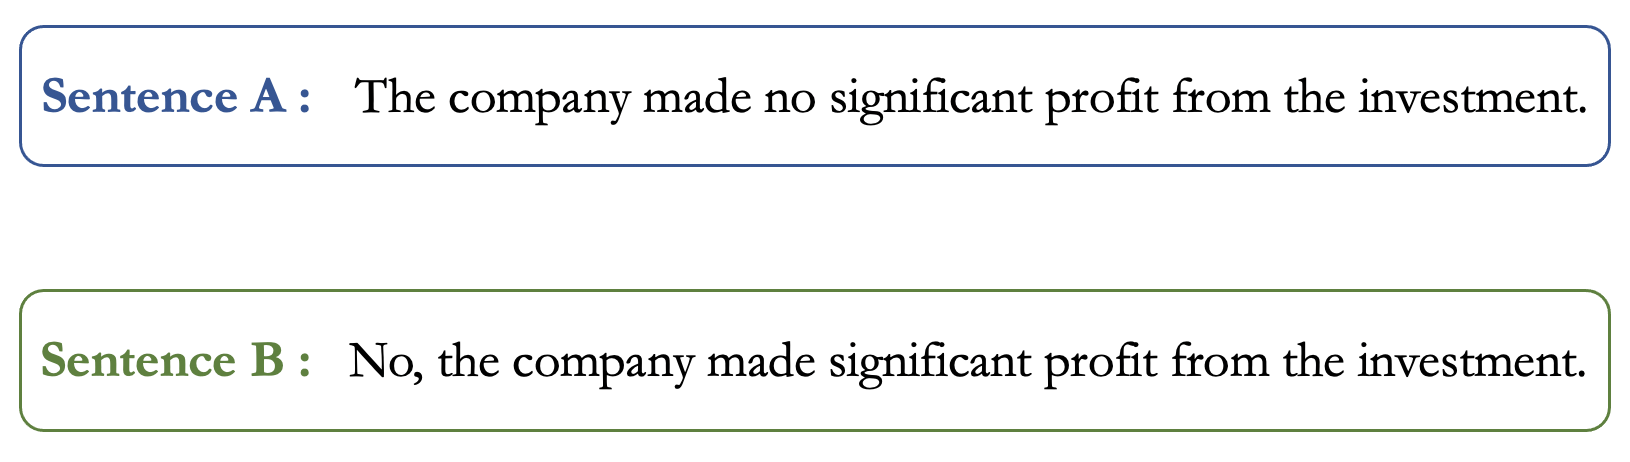

We will be using LSTM. Just as with any standard NLP procedure, we need to capture some numerical representation of our text. But this time, instead of treating the sentence of words as a bag, we treat them as a sequence.

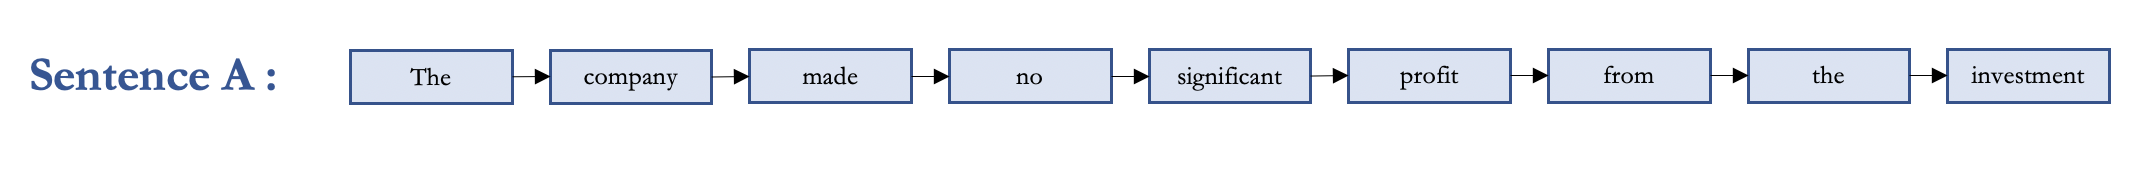

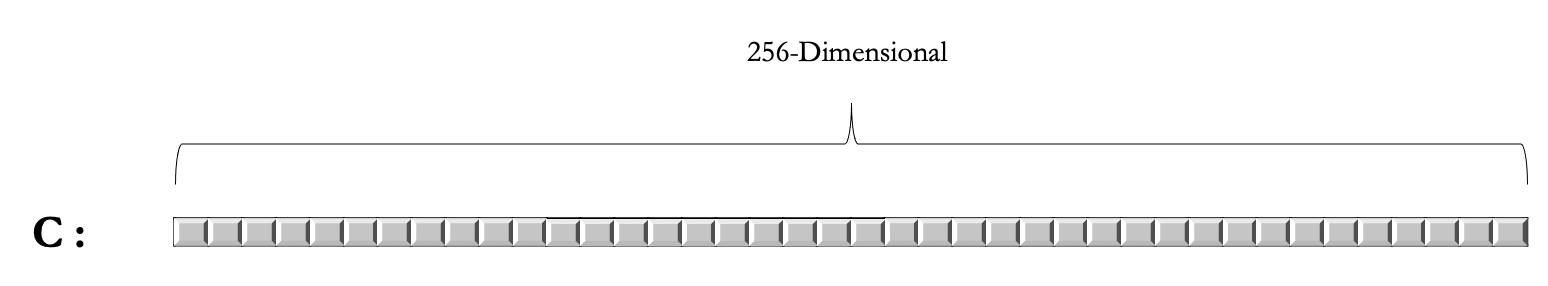

We start **R** at the beginning of the sentence sequence and iterate it through each of the words. Every time we arrive at a word, we update the **C** vector intelligently to capture sentence structure, the current word, and more.

This brings us to the very definition of LSTM. LSTM stands for long short-term memory network. It learns the long-term dependencies in a sentence through this sequence-level interpretation. Thus, we pass our vector **C** through the sequence and learn some long term representation **C*** of our sentence. Each word and the words directly before it are what we refer to as the short term memory part of the LSTM.

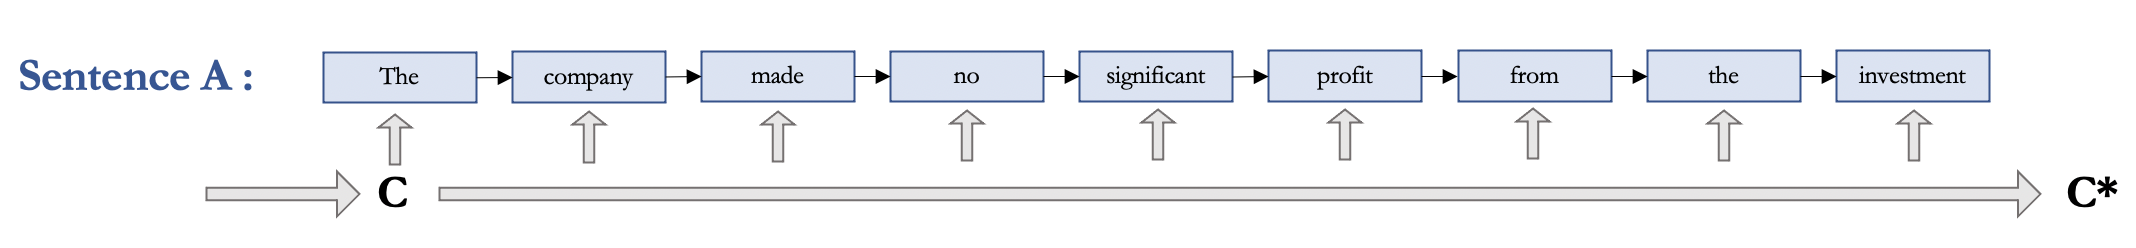

In [ ]:
#@title Run this to load the datasets and setup the environment. { display-mode: "form" }
# Run this every time you open the spreadsheet
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")
#from torchtext.vocab import GloVe
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
import numpy
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Keras-Preprocessing
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

from keras.preprocessing.text import Tokenizer
import string


def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

PUNCTUATION = '!#$%&()*,-./:;<=>?@^_`{|}~'

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    return text

def pad_sequences_train(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_train['Sentence'].values)
  X_train = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_train

def pad_sequences_test(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_test['Sentence'].values)
  X_test = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_test

def run_model(X_train, y_train, X_test, y_test, epochs=5, max_sequence_length=256, max_nb_words=1000, embedding_dim=300):
  if any(x is None for x in [X_train, y_train, X_test, y_test, epochs, max_sequence_length, max_nb_words, embedding_dim]):
    print('Replace the None values above with your new values before calling the run_model() function.')
    return None, None, None
  model = Sequential()
  model.add(Embedding(max_nb_words+1, embedding_dim, mask_zero=True, input_length=max_sequence_length))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(n_labels, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  return model, history, test_accuracy


EMBEDDING_DIM = 300


nltk.download('wordnet')

!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

print ("Train & Test Files are loaded")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'keras.preprocessing.text'

### **Exploring the Datasets**

Note: Additional aspect when pre-processing data for LSTM.

In [ ]:
df_train = get_finance_train()
df_train.head()

In [ ]:
df_test = get_finance_test()
df_test.head()

### **Data Preprocessing**

The aditional pre-processing step is encoding our text into vectors of _uniform length_. To do this we will _pad_ our sentences. Additionally, we must remove all punctuation



Punctuation mark removal with a python library named `regex`! A **RegEx**, otherwise known as a **Regular Expression**, is simply a special sequence of characters. We can use the `regex` python library to replace, search for, or perform operations general operations on any desired sequence of characters. In this case, `PUNCTUATION`.

In [ ]:
print(PUNCTUATION)

Now, we will use the `regex` library named `re` to filter out the punctuation. To do so, we need to make a `regex` object using the function `re.compile("[%s]" % PUNCTUATION)` and passing in our `PUNCTUATION` string as shown.

In [ ]:
PUNCTUATION_RE = re.compile("[%s]" % PUNCTUATION)

In [ ]:
filtered_sample_sentence = PUNCTUATION_RE.sub("", sample_sentence)
print(filtered_sample_sentence)

In [ ]:
print(clean_text(sample_sentence))

In [ ]:
#Cleaning all the sentences in Finance Train and Finance Test.

df_train['Sentence'] = df_train['Sentence'].apply(clean_text)
df_test['Sentence'] = df_test['Sentence'].apply(clean_text)

#### **Padding Sequences**

To ensure that we can properly create a representation using an LSTM, we need to perform an operation referred to as sentence padding. In standard non-language datasets, you will always have the same number of features for each example. However, that may not always be the case with sentence data if we treat it as a sequence of words. Some sentences will be longer than others. Therefore, we will add empty features (referred to as padding) to smaller sentences such that all sentences will be the same length.

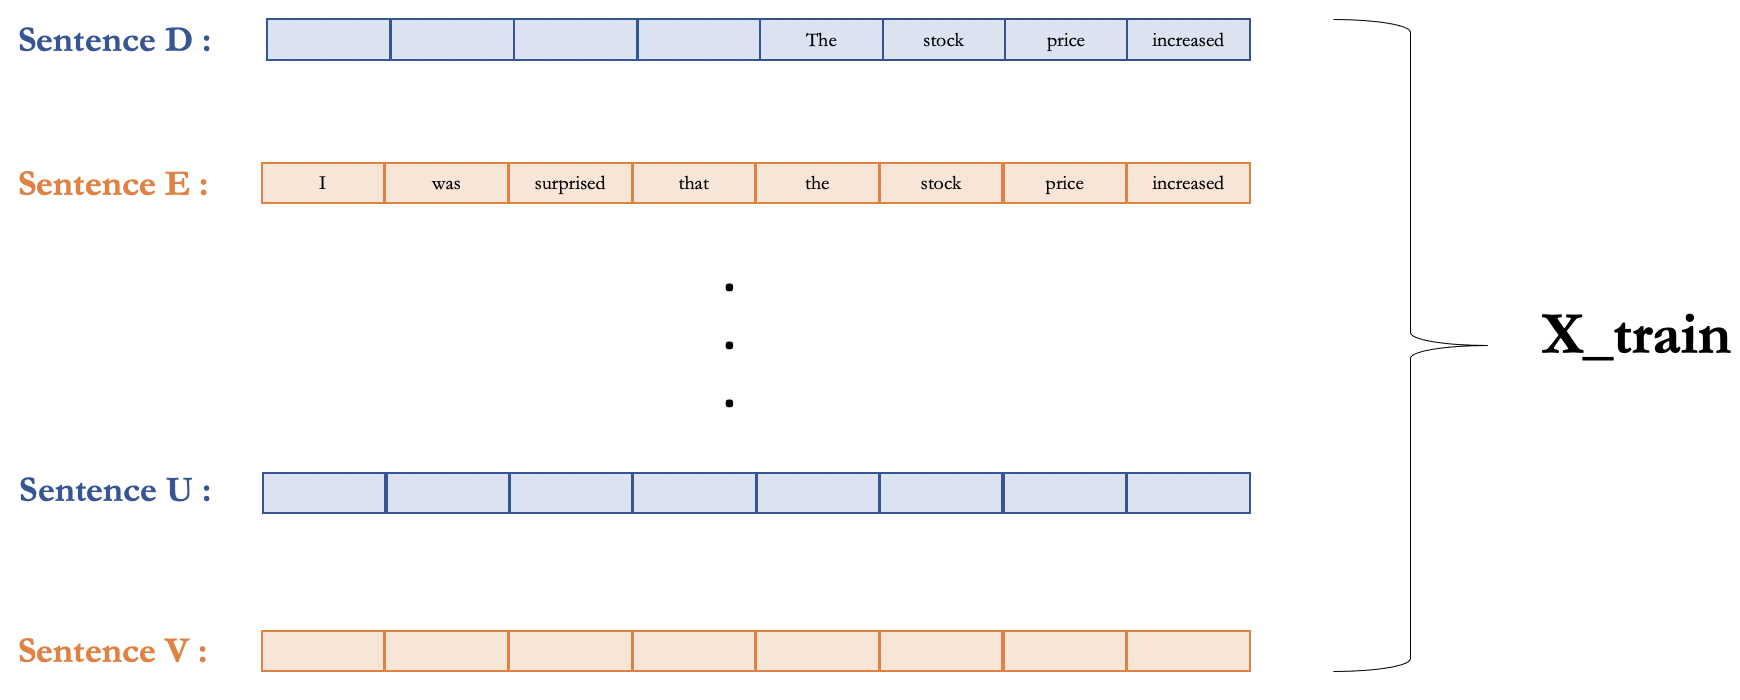


We will capture this property of the length that we want all the sequences to be padded to in a variable called `MAX_SEQUENCE_LENGTH` and will set it to `256` to be able to capture sentences of maximum length `256` in our model.

In [ ]:
MAX_SEQUENCE_LENGTH = 256

In [ ]:
MAX_NB_WORDS = 1000

Calling the `pad_sequences_train(df_train, df_test)` method while passing in `df_train` and `df_test` as shown and save the result in a variable named `X_train`.

In [ ]:
X_train = pad_sequences_train(df_train, df_test)
print(X_train[0])

In [ ]:
X_test = pad_sequences_test(df_train, df_test)
print(X_test[0])

#### **Creating y Dummy Variables - Training Dataset**

The original $y$ labels are given as integers. However, we want to convert these to one-hot encoded vectors of length 3 to signify which of the labels for each of the examples we would assign.

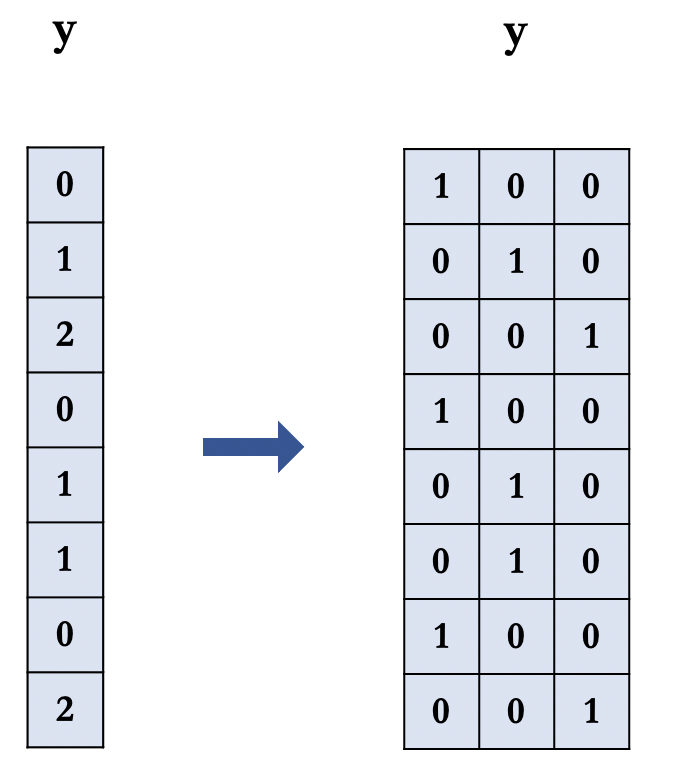

To do so, we will use a `pandas` function called `get_dummies()`.

In [ ]:
y_train = pd.get_dummies(df_train['Label']).values

In [ ]:
y_test = pd.get_dummies(df_test['Label']).values

We'll keep track of the number of labels and a map from the label integer to the meanings in variables `n_labels` and `label_map` below.

In [ ]:
n_labels = 3
label_map = {0 : "negative",
             1 : "neutral",
             2 : "positive"}

In [ ]:
#Instantiating our model!

model = Sequential()
model.add(Embedding(MAX_NB_WORDS+1, EMBEDDING_DIM, mask_zero=True, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(n_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [2]:
epochs = 5
batch_size = 64

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#### **Evaluating model**



In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

In [ ]:
model, history, test_acc = run_model(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    epochs=5,
    max_sequence_length=256,
    max_nb_words=1000,
    embedding_dim=100
)

In [ ]:

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(14,12))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

predictions = model.predict(X_test)
y_true, y_preds = [], []
for logits in predictions:
  y_preds.append(np.argmax(logits))
for dummies in y_test:
  y_true.append(np.argmax(dummies))
plot_confusion_matrix(y_true, y_preds)

### END CODE